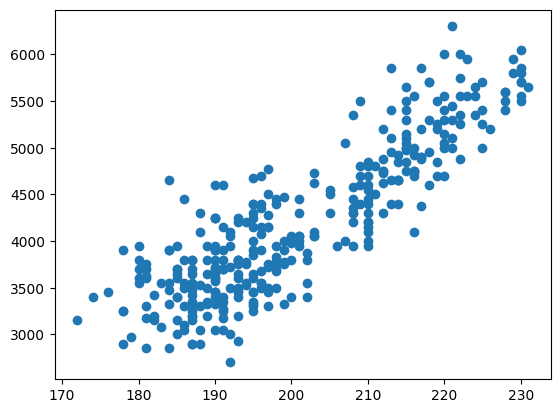

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

df= sns.load_dataset('penguins')
plt.scatter(df['flipper_length_mm'],df['body_mass_g'])
plt.show()

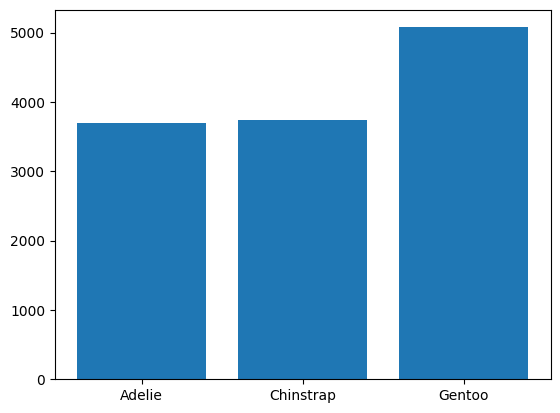

In [2]:
df_group = df.groupby('species')['body_mass_g'].mean().reset_index()
plt.bar(x = df_group['species'], height = df_group['body_mass_g'])
plt.show()

In [3]:
import matplotlib as mpl
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc


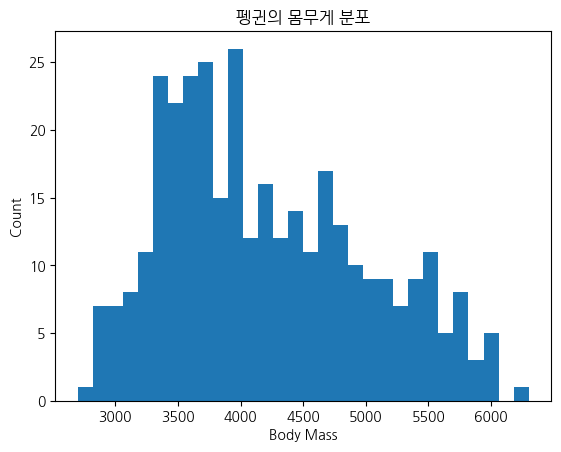

In [4]:
plt.rc('font', family='NanumGothic') # 허 띄워쓰기만 빼면 되는거였네
plt.hist(df['body_mass_g'], bins=30)
plt.xlabel('Body Mass')
plt.ylabel('Count')
plt.title('펭귄의 몸무게 분포')
plt.show()

In [5]:
print(mpl.get_cachedir())

/Users/jyp/.matplotlib


In [6]:
import matplotlib.pyplot as plt

# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

['STIXGeneral', 'STIXGeneral', 'cmss10', 'STIXSizeOneSym', 'STIXSizeFourSym', 'DejaVu Sans', 'cmtt10', 'DejaVu Serif', 'cmmi10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'cmr10', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'NanumGothic', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'STIXGeneral', 'NanumGothic', 'cmb10', 'STIXNonUnicode', 'STIXNonUnicode', 'DejaVu Sans Display', 'STIXNonUnicode', 'cmex10', 'STIXSizeTwoSym', 'NanumGothicOTF', 'STIXGeneral', 'NanumGothic', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif', 'NanumGothicOTF', 'cmsy10', 'NanumGothic', 'NanumGothicOTF', 'DejaVu Sans', 'NanumGothicOTF', 'Verdana', 'STIXVariants', 'Sinhala Sangam MN', '.Keyboard', 'Noto Sans Rejang', 'Noto Sans Linear A', 'Silom', 'Apple Braille', 'Sukhumvit Set', 'Oriya Sangam MN', 'Wingdings', 'Noto Sans Sundanese', 'Gujarati MT', 'Helvetica Neue', 'Noto Sans Me

In [7]:
import pandas as pd

df_unrate = pd.read_csv(    'https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
                       )
df_unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


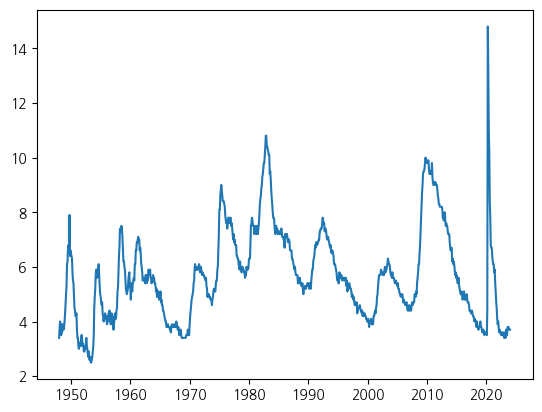

In [8]:
df_unrate['DATE'] = pd.to_datetime(df_unrate['DATE'])

plt.plot(df_unrate['DATE'], df_unrate['VALUE'])
plt.show()

In [9]:
df_unrate = df_unrate.rename(columns={'DATE':'date','VALUE':'value'})
df_unrate


,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
908,2023-09-01,3.8
909,2023-10-01,3.8
910,2023-11-01,3.7
911,2023-12-01,3.7


In [10]:
df_unrate

,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
908,2023-09-01,3.8
909,2023-10-01,3.8
910,2023-11-01,3.7
911,2023-12-01,3.7


한 번에 여러개의 그래프 나타내기
하나의 figure 내에는 여러 개의 axes를 그릴수도 있다. 이를 실행하는 코드는 책이나 설명하는 사람 마다 약간씩 다르며, 그 이유에 대해 간략하게 설명하겠다. matplotlib 패키지는 크게 두 가지 방법으로 사용할 수 있다.

stateless API (objected-based): 내가 지정한 figure, 내가 지정한 axes에 그림을 그리는 방법
stateful API (state-based): 현재의 figure, 현재의 axes에 그림을 그리는 방법
stateless 방법은 figure와 axes를 직접 만들어야 하고, 이는 객체지향적 특징을 가지고 있다고 볼 수 있다. 반면 stateful 방법은 현재의 figure와 axes를 자동으로 찾아 그곳에 그래프를 나타내는 방식이다. 처음에는 stateless 방법만 존재했으나 더 편리한 사용을 위해 wrapper 모듈인 pyplot이 개발되었고 이를 통해 stateful 방법을 사용할 수 있다. 그래프를 간단하게 표현할 때는 stateful 방법으로도 충분하지만, 보다 정교한 작업을 할 때는 stateless 방법을 사용해야 한다.

먼저 stateless 방법을 사용해 그래프를 나타내보도록 하자.

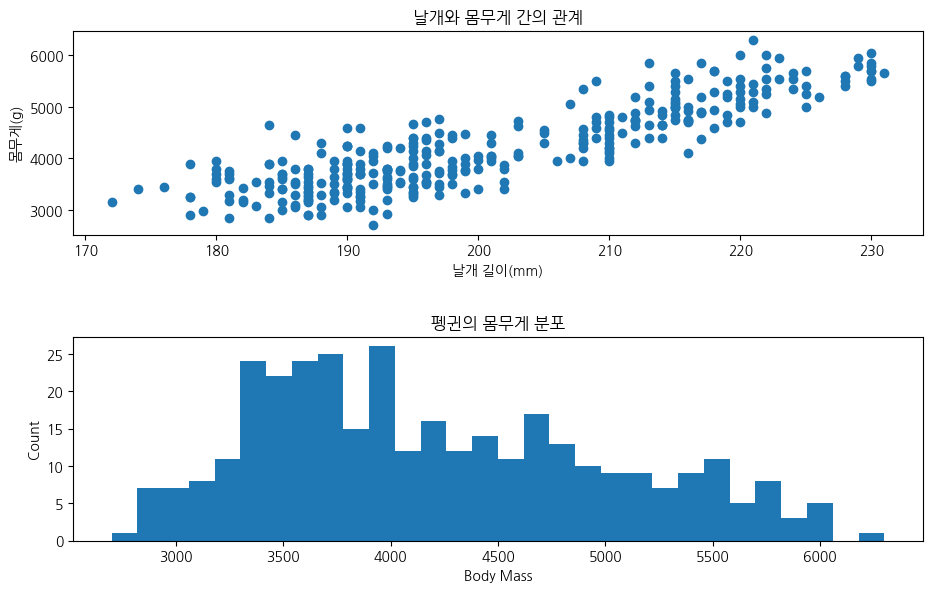

In [11]:
fig, axes = plt.subplots(2,1, figsize= (10,6))

axes[0].scatter(df['flipper_length_mm'],df['body_mass_g'])
axes[0].set_xlabel('날개 길이(mm)')
axes[0].set_ylabel('몸무게(g)')
axes[0].set_title('날개와 몸무게 간의 관계')

axes[1].hist(df['body_mass_g'], bins= 30)
axes[1].set_xlabel('Body Mass')
axes[1].set_ylabel('Count')
axes[1].set_title('펭귄의 몸무게 분포')

plt.subplots_adjust(left = 0.1, right = 0.95, bottom = 0.1, top= 0.95, wspace = 0.5, hspace = 0.5)

plt.show()

In [12]:
import seaborn as sns
df= sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


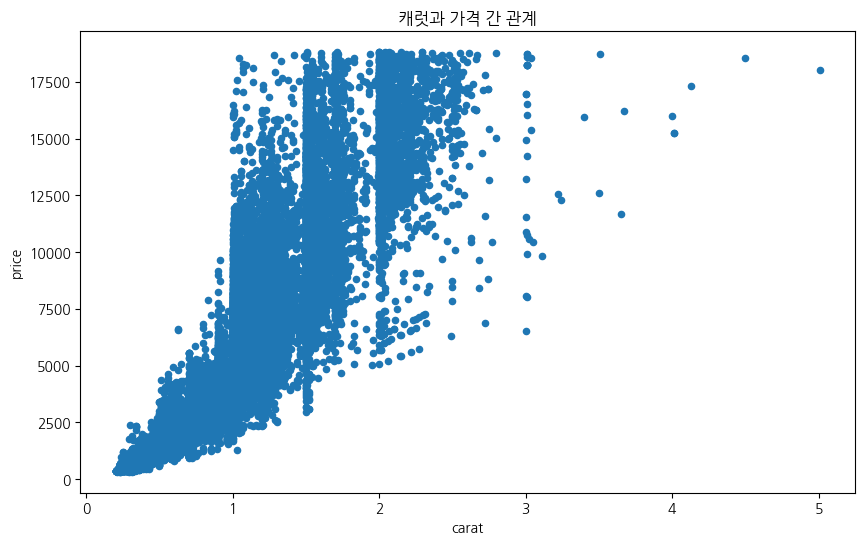

In [13]:
plt.rc('font', family = 'NanumGothic')
df.plot.scatter(x = 'carat', y='price', figsize= (10,6), title= '캐럿과 가격 간 관계')
plt.show()

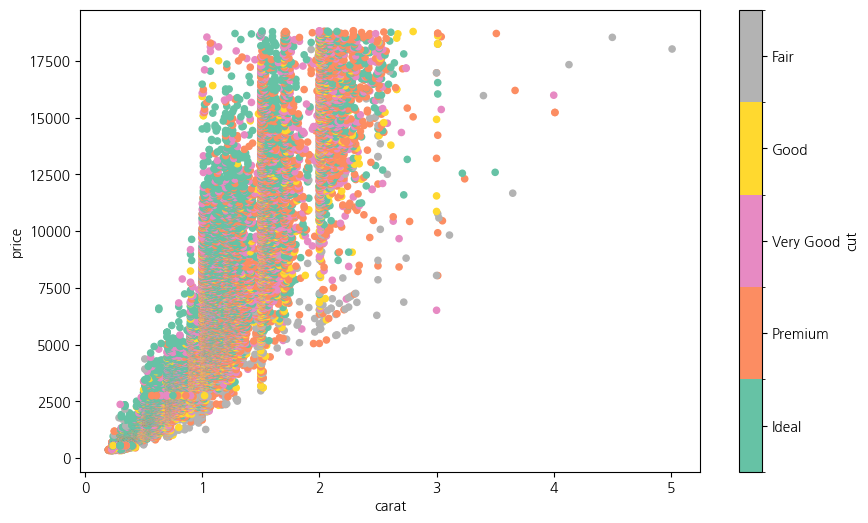

In [14]:
df.plot.scatter(x='carat', y= 'price', c = 'cut', cmap = 'Set2', figsize = (10,6))
plt.show()

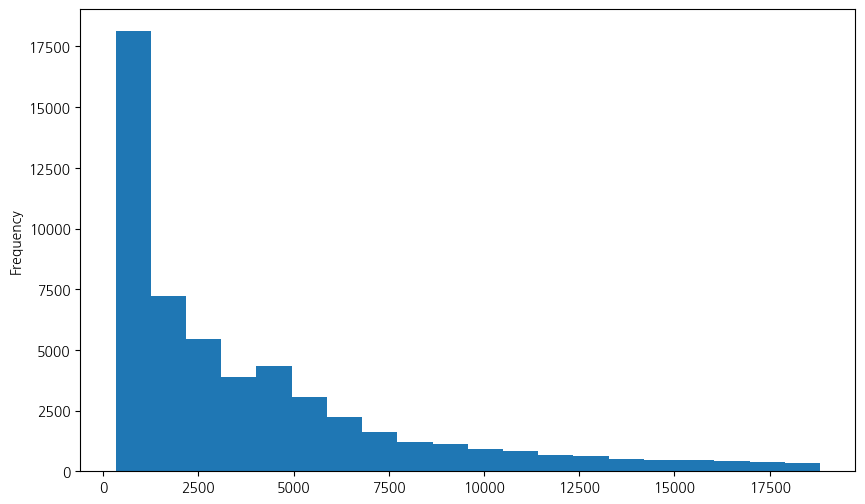

In [15]:
df['price'].plot.hist(figsize=(10,6), bins = 20)
plt.show()

/var/folders/b4/t_86y4k53q7chlv3p3hw3p3c0000gn/T/ipykernel_3206/1719399558.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('color')['carat'].mean().plot.bar(figsize=(10,6))


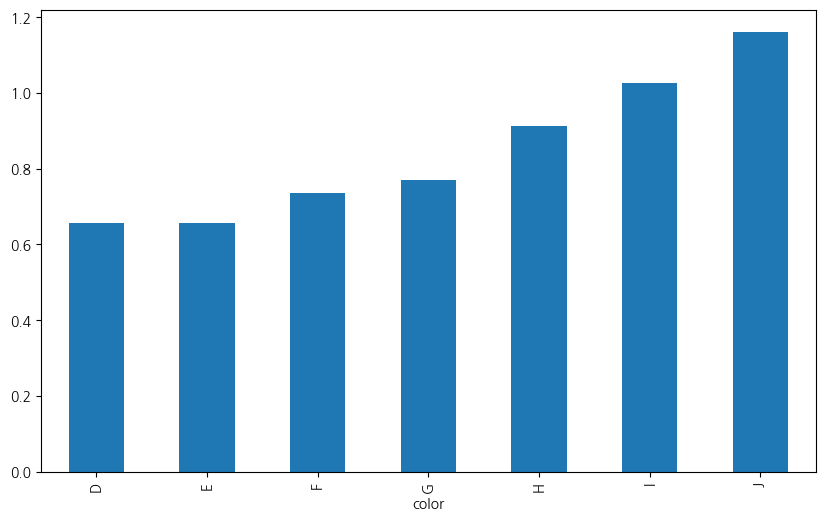

In [17]:
df.groupby('color')['carat'].mean().plot.bar(figsize=(10,6))
plt.show()

In [18]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


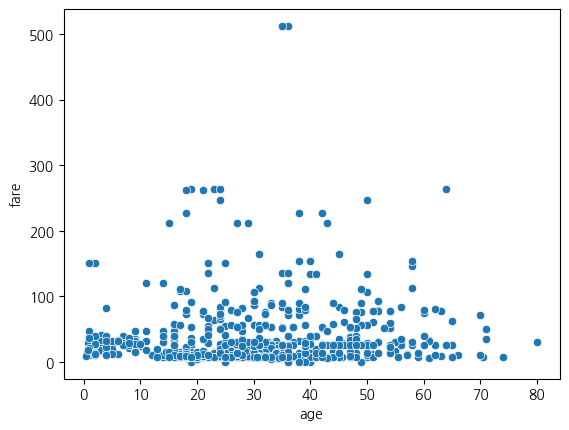

In [26]:

sns.scatterplot(data=df, x ='age', y = 'fare')
plt.show()

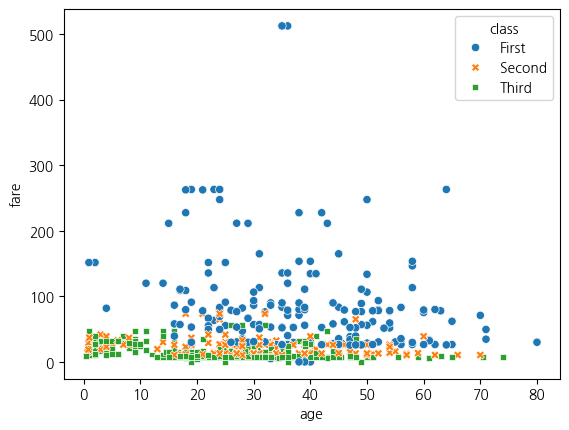

In [27]:
sns.scatterplot(data=df, x ='age', y ='fare', hue = 'class', style = 'class')
plt.show()

In [28]:
df_pivot = df.pivot_table(index = 'class', columns = 'sex', values = 'survived', aggfunc = 'mean')
df_pivot

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


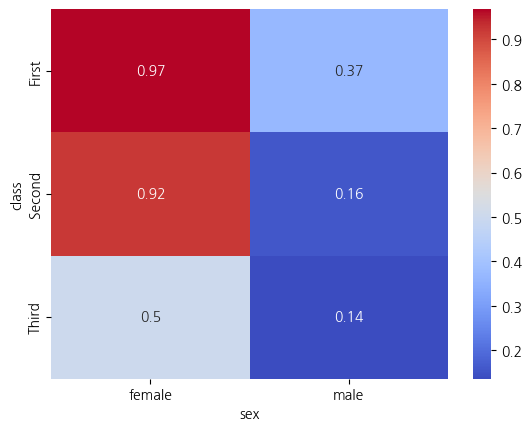

In [29]:
sns.heatmap(df_pivot, annot = True, cmap = 'coolwarm')
plt.show()